# $$Logistic~~Regression$$


Though this is called Regression, it falls under another category of **Supervised Learning** which is **Classification**.


# **Classification**


**Classification** is a process of categorizing a given set of data into **classes**. It can be performed on both structured or unstructured data. The process starts with predicting the class of given data points. The classes are often referred to as **targets**, **labels** or **categories**.

The classification predictive modeling is the task of approximating the mapping function from input variables to discrete output variables. The main goal is to identify which **class**/**category** the new data will fall into.

For example:

- Given the size of the cancer tumour, we can predict whether this is a benign or malignant tumour.
- Given the annual income of an individual, banks can predict whether that individual is capable of paying the debt.


As we can see here, the label that we want to predict take on a small number of discrete values. For **Binary Classification**, the label $y$ only take on two values: $0$ (malignant, cannot pay debt) and $1$ (benign, can pay debt) .


We can attempt to use linear regression and map all predictions greater than $0.5$ as $1$ and all less than $0.5$ as $0$ . But this doesn't work well because classification is not actually a linear function.


# **Multiclass Classification**

**Multiclass Classification** occurs when the data set has more than two categories. So instead of $y \in \{0, 1\}$ we will expand it so that $y \in \{0, 1, 2, ..., n\}.$

Since we have $n + 1$ discrete categories, we can divide our problems into $n + 1$ **Binary Classification** problems; in each one, we predict the corresponding $y.$ This approach is called **One-vs-All**.

$$y \in \{0, 1, 2, ..., n\}$$
We perform **Logistic regression** for each category $y$ to get:
$$f_\theta^{(0)} = P(y=0|x;\theta)$$
$$f_\theta^{(1)} = P(y=1|x;\theta)$$
$$f_\theta^{(2)} = P(y=2|x;\theta)$$
$$...$$
$$f_\theta^{(n)} = P(y=n|x;\theta)$$
And then the prediction will be the best probability in all categories $\underset{i}{\text{max}}(f_\theta^{(i)}(x))$

Simply speaking, we are choosing one class and lumping all the others into a single second class. By repeating this process and apply binary logistic regression to each cases, and then use the hypothesis function that returned the highest value as our prediction (since with the given value $x,$ the higher the odd, the more likely it is correct).

# Definition


## **General formula**


Since we want our hypothesis function to give certain discrete values ( $0 \leqslant f_\theta(x) \leqslant 1 $ ), which cannot be achieved with normal linear function $f_\theta(x) = \theta^{T} x$ . That is why we are using something called the **Sigmoid function**:
$$g(z) = \frac{1}{1 + e^{-z}}$$
$$\Rightarrow f_\theta(x) = g(\theta_{T}x) = \frac{1}{1 + e^{-\theta_{T}x}}$$
This is the reason why **Logistic function** can be used interchangeably with **Sigmoid function**.

Here is how the Sigmoid function look like:

![Sigmoid function illustration](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/1WFqZHntEead-BJkoDOYOw_2413fbec8ff9fa1f19aaf78265b8a33b_Logistic_function.png?expiry=1638662400000&hmac=8EA0eH0xwVK5nkS2SMV-L8FDqmb3Sc_vHJ-PG5r-gz0)


## **Usage**


This can be used to predict the probability that the label $y = 1$ on input $x$ .
For example, if:
$$x = \begin{bmatrix} x_0 \\ x_1 \end{bmatrix} = \begin{bmatrix} 1 \\ \text{Tumor Size} \end{bmatrix} $$
$$\Rightarrow f_\theta(x) = 0.7 $$
Then this tells that there is a 70% chance that the patient's tumor is malignant.

Statistically, this could be written as: 
$$f_\theta(x) = P(y = 1 | x; \theta)~~\text{Meaning: Probability that $y = 1$, given $x$, parameterized by $\theta$}$$
Since there are only two possible outcomes then
$$P(y = 0 | x; \theta) + P(y = 1 | x; \theta) = 1$$


# Decision Boundary


## **Definition**

To get our discrete $0$ and $1$ , we can translate the output of the hypthesis function as follows:
$$y = \begin{cases} 1, & \text{if $f_\theta(x) \geqslant 0.5$} \\
                    0, & \text{if $f_\theta(x) < 0.5$    } \end{cases}$$

We already know that if $z \geqslant 0$ then our logistic function $g(z) \geqslant 0.5.$

So by assigning $z = \theta^{T}X,$ we can conclude that $f_\theta(x) = g(\theta^{T}X) \geqslant 0.5$ with $\theta^{T}x \geqslant 0$ .

To sum up:
$$y = \begin{cases} 1, & \text{if $\theta^{T}X \geqslant 0$} \\
                    0, & \text{if $\theta^{T}X < 0$    } \end{cases}$$

The **decision boundary** is the line that separates the area where $y = 0$ and where $y = 1.$ It is created by our hypothesis function $f_\theta(x).$ 

For example:
$$\theta = \begin{bmatrix} 5 \\ -1 \\ 0 \end{bmatrix}~~~~~X = \begin{bmatrix} 1 \\ x_1 \\ x_2 \end{bmatrix}$$
$$\text{So $\theta^{T}x = 5 + (-1)x_1 + 0x_2$}$$
$$\text{And because $y = 1$ if $\theta^{T}X \geqslant 0$}$$
$$\text{Then $5 - x_1 \geqslant 0$}$$
$$\Rightarrow x_1 \leqslant 5$$

In this case, our decision boundary is a straight vertical line where $x_1 = 5$ , and everything to the left of that denotes $y = 1,$ while everything to the right denotes $y = 0.$

**One important note:** The input to the sigmoid function $g(z)$ **does not** need to be linear. You can use polynomial features to fit the model better.

For example, it could be a function describe a circle $z = \theta_0 + \theta_1x_1^{2} + \theta_2x_2^{2}$

# Cost Function

## **Definition**

We cannot use the same cost function that we use for **Linear Regression** because the **Logistic Function** will cause the graph of the **Cost Function** to be wavy, resulting in many local optimas. In other words, it will not be a convex function. This is why we have to come up with another way to define the **Cost Function**.

The **Cost Function** for **Logistic Regression** looks like this:
$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}{\text{Cost}(f_\theta(x^{(i)}),  y^{(i)})}$$
With: 
$$\text{Cost}(f_\theta(x^{(i)}),  y^{(i)}) = \begin{cases} -\log(f_\theta(x)) & \text{if $y = 1$} \\
                                                           -\log(1 - f_\theta(x)) & \text{if $y = 0$} \end{cases}$$
Here I omitted the superscript $^{(i)}$ to simplify it since it is the same for all training example.

From the given definition, we can conclude that:
$$\text{Cost$(f_\theta(x, y)) = 0$ if $f_\theta(x)$ = 0}$$
$$\text{Cost$(f_\theta(x, y)) \to \infty$ if $y = 0$ and $f_\theta(x) \to 1$}$$
$$\text{Cost$(f_\theta(x, y)) \to \infty$ if $y = 1$ and $f_\theta(x) \to 0$}$$

The last two equations captures intuition that when the predicted label $f_\theta(x)$ is wrong (oppose to $y$ ), we will penalize the learning algorithm by a very large cost. 

**For example**, if a patient with a malignant tumor was predicted as a benign one, the consequence would have been very large.

**By writing the Cost Function this way guarantees that $J(\theta)$ is convex for Logistic Regression**.

## **Simplifying the Cost Function**

In reality, this **Cost Function** is too complicated since there are $2$ cases. However, since $y$ has strictly $2$ discrete values: $0$ and $1$ so it can be simplified to this:
$$\text{Cost}(f_\theta(x, y)) = -y\log(f_\theta(x)) - (1 - y)\log(1 - f_\theta(x))$$
All right, it might look intimidating for you. But if you examine it closely, you will see that:
* If $y = 0$ then $\text{Cost}(f_\theta(x, y))$ = $-\log(f_\theta(x))$
* If $y = 1$ then $\text{Cost}(f_\theta(x, y))$ = $-\log(1 - f_\theta(x))$

It's that simple!

So now since we have the simplified $\text{Cost}(f_\theta(x, y)).$ We can now plug it back into $J(\theta):$

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}{\text{Cost}(f_\theta(x^{(i)}),  y^{(i)})}
          = -\frac{1}{m} \sum_{i=1}^{m}{\left[y^{(i)}\log(f_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - f_\theta(x^{(i)})\right]}$$
This function has another name: **Binary Cross-Entropy Loss**.

The reason behind this **Cost Function** is that it can be derived from statistics using the **the Principle of Maximum Likelihood Estimation**, which is an idea in statistics for how to efficiently find parameters' data for different model. And it also has a nice property that it is **Convex**.

To fit the parameters $\theta,$ we have to find the minimized **Cost Function** $\underset{\theta}{\text{min }}J(\theta).$ After minimized this, we will get the optimized parameters $\theta,$ which could be put into the hypothesis function $f_\theta(x)$ to make a prediction given a new $x.$

To achieve the optimal $\theta,$ we will use some optimization algorithm. But for simplicity, we will use **Gradient Descent**.

## **Vectorized Implementation**

$$h = g(\theta X)$$
$$J = \frac{1}{m} \cdot \left( -y^{T}\log(h) - (1 - y)^{T}\log(1 - h) \right) $$

With: 
* $\theta$ is a vector with a dimension of $n \times 1$ contains $\theta_0, \theta_1, ..., \theta_n.$
* $X$ is a matrix with a dimension of $m \times n$ contains every training examples on each row.
* $y$ is a vector with a dimension of $n \times 1$ contains every training label on each row.

# Gradient Descent

## **Definition**

The algorithm is still the same:

$\text{repeat until convergence:}$ $$\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)~~\text{(simutaneously update all $\theta_j$)}$$

Since $$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m}{[y^{(i)}\log(f_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - f_\theta(x^{(i)})]}$$

In which $f_\theta(x) = g(\theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n)$

The derivative now will be:
$$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m}{\left[(f_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j\right]}$$

I won't prove since it is very long and confusing, but if you understand Calculus then you could prove it yourself.

So the **Gradient Descent** algorithm will become:

$\text{repeat until convergence:}$ $$\theta_j = \theta_j - \frac{\alpha}{m} \sum_{i=1}^{m}{\left[(f_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j\right]}~~\text{(simutaneously update all $\theta_j$)}$$

If you take a closer look, you will see that the algorithm looks identical to **Linear Regression**!!! But it is not the same since the hypothesis in **Logistic Regression** is different from **Linear Regression**.

So even though the $\theta~-$ updating rule looks identical, it is not the same as the Gradient Descent for **Linear Regression** because the definition of the hypothesis function has changed.

## **Vectorized Implementation**

$$\theta = \theta - \frac{\alpha}{m} X^{T} \left( g(X\theta) - y \right)$$

## **Regularized Gradient Descent for Logistic Regression**

The principle is the same as before: add a regularizing term to the original **Cost Function** to penalize $\theta$ parameters, and of course, we have to exclude the bias term $\theta_0.$
$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m}{\left[ y^{(i)}\log(f_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - f_\theta(x^{(i)})) \right]} + \frac{\lambda}{2m} \sum_{j=1}^{n}{\theta_j^2}$$

By taking partial derivative for each $\theta_j$ and update $\theta_0$ separately we have the regularized algorithm:

$\text{Repeat until convergence:}$
$$\theta_0 = \theta_0 - \alpha \cdot \frac{1}{m} \sum_{i=1}^{n}{\left[ (f_\theta(x^{(i)}) - y^{(i)})x_0^{(i)} \right]}$$
$$\theta_j = \theta_j - \alpha \cdot \left\{ \frac{1}{m} \sum_{i=1}^{n}{\left[ (f_\theta(x^{(i)}) - y^{(i)})x_0^{(i)} \right] +\frac{\lambda}{m} \theta_j} \right\}$$

# Other Optimization Algorithms

Aside from **Gradient Descent**, we have other more advanced algorithms such as: **Conjugate Gradient**, **BFGS**, **L-BFGS**. One of their advantages is that it does not need to manually choose the learning rate $\alpha.$ But these are very complex algorithms to implement. So we should use predefined function from libraries.

# Demo Model

## **Data Preprocessing**

### **Read input, build DataFrame and plot data points.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd         

plt.rcParams["figure.figsize"] = (10, 8)

header_names = ['Years of Experience', 'Salary', 'Loan']

df = pd.read_csv('../../Training_set/loan_salary_data.csv', names=header_names, header=0)

m = len(df)
n = len(df.columns)

df.head()

,Years of Experience,Salary,Loan
0,6.3,10702,0
1,4.2,11180,0
2,6.1,11566,0
3,3.3,12669,0
4,5.1,13055,0


Now we implement $\theta$ as a $3 \times 1$ dimensions matrix, $X$ as a $m \times 3$ dimensions matrix by adding a bias term with all $1$ and $Y$ as a $m \times 1$ dimensions matrix.

In [2]:
data = np.array(df)

X = np.array(df.iloc[:, 0:2])
X = np.hstack((np.ones((m, 1)), X))
y = np.array(df.iloc[:, [2]])

theta = np.zeros((3, 1))

print(theta)
print(X[:5])
print(y[:5])

[[0.]
 [0.]
 [0.]]
[[1.0000e+00 6.3000e+00 1.0702e+04]
 [1.0000e+00 4.2000e+00 1.1180e+04]
 [1.0000e+00 6.1000e+00 1.1566e+04]
 [1.0000e+00 3.3000e+00 1.2669e+04]
 [1.0000e+00 5.1000e+00 1.3055e+04]]
[[0]
 [0]
 [0]
 [0]
 [0]]


We will plot the data points onto a plot to have a better visualization.

In [3]:
def plotData(X, y): 
    positive = np.where(y == 1)
    negative = np.where(y == 0)

    plt.scatter(X[positive, -2], X[positive, -1], s=60, c='green', marker='+', )
    plt.scatter(X[negative, -2], X[negative, -1], s=60, c='yellow', marker='o', edgecolors='black')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.legend(['Can pay loan', 'Cannot pay loan'])

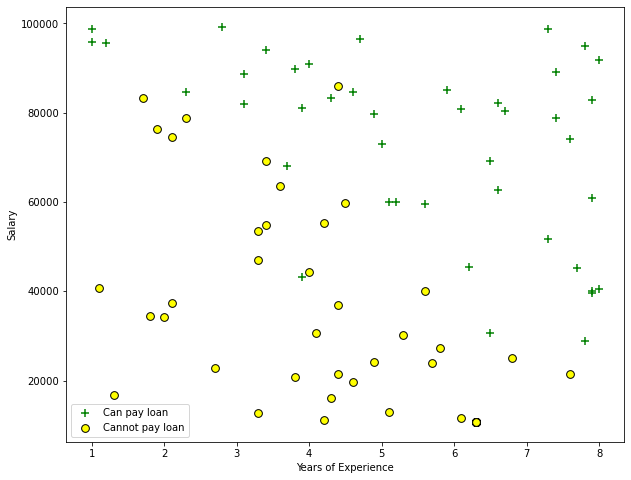

In [4]:
plotData(X, y)

### **Hypthesis, Sigmoid Function and Cost Function**

### Sigmoid Function

Recall that the hypothesis is defined as: $$f_\theta(x) = g(\theta^{T}X)$$
where function $g$ is the Sigmoid Function. The Sigmoid Function is defined as:
$$g(z) = \frac{1}{1 + e^{-z}}$$
So first we implement the Sigmoid Function:

In [5]:
def sigmoid(z) :
    return 1 / (1 + np.exp(-z))

### Cost Function and Gradient

Now we implement the Cost Function and Gradient for the Logistic Regression. Recall that the cost function in logistic function is:
$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m}{\left[ y^{(i)}\log(f_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - f_\theta(x^{(i)})) \right]},$$
and the Gradient of the cost is a vector of the same length as $\theta$ where $j^{th}$ (for $j \in [0, 1, ..., n]$) is defined as:
$$\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^{m}{\left( f_\theta(x^{(i)}) - y^{(i)} \right)x^{(i)}}$$

So we will define a function that return the result of the Cost Function and the matrix contains the Gradient of each $\theta.$

In [6]:
def costFunction(theta, X, y) :
    m = len(y)
    z = np.dot(X, theta)

    J = np.dot(y.T, np.log(sigmoid(z)) + np.dot((1 - y).T, np.log(1 - sigmoid(z)))) / -m

    grad = np.dot(X.T, sigmoid(z) - y) / m

    return J, grad

In [7]:
cost, grad = costFunction(theta, X, y)
print('Cost at the initial theta (zeros):', cost[0][0])

Cost at the initial theta (zeros): 14.15753116293688


In [8]:
print('Gradient of the initial theta:', grad)

Gradient of the initial theta: [[-3.7500000e-02]
 [-5.6375000e-01]
 [-1.0819175e+04]]


### **Gradient Descent for Logistic Regression**

Now we can try and use our data to plot a Decision Boundary.

In [9]:
def plotDecisionBoundary(theta, X, y) :
    plotData(X, y)

    plotX = np.array(X[:, -2].min(), X[:, -2].max())
    plotY = 

    plt.plot(plotX, plotY, c='red', markersize=10)

In [ ]:
plotDecisionBoundary(theta, X, y)

In [10]:
def gradientDescent(theta, X, y, max_iterations=500, learning_rate=0.001, threshold=1e-3):
    J_history, grad = costFunction(theta, X, y)

    diff = 1e10
    i = 0

    while i < max_iterations and diff > threshold:
        theta = theta - learning_rate * grad

        J, grad = costFunction(theta, X, y)

        J_history = np.hstack(J_history, J)

        diff = J_history[-2] - J_history[-1]
        i += 1

    return theta, J_history